# **Import Required Packages**

In [ ]:
import gdown
import os
from PIL import Image
import matplotlib.pyplot as plt

# **Install BRAILS**

In [ ]:
!pip install git+https://github.com/NHERI-SimCenter/BRAILS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/NHERI-SimCenter/BRAILS to /tmp/pip-req-build-9vfsvoa3
  Running command git clone -q https://github.com/NHERI-SimCenter/BRAILS /tmp/pip-req-build-9vfsvoa3
     |████████████████████████████████| 125 kB 2.1 MB/s 
     |████████████████████████████████| 509 kB 13.4 MB/s 
  Created wheel for BRAILS: filename=BRAILS-2.0.1.dev460+g153f0aa-py3-none-any.whl size=9154887 sha256=8f417663ec7449019bf1a344d931997ddabd80381c0eef5f364a21afcea10531
  Stored in directory: /tmp/pip-ephem-wheel-cache-q85ksjpe/wheels/95/f4/e3/a6a0d6655270cc9295155895448d84860de3e7b8a1f4fa8840
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d8b1f4ca165bc64c01b898a36268abfc4fbb76f0c17e09d2ae5d9dec4cc1790c
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
  Created wheel for wget: filename=wget-3.2-py3-

# **Download Training/Test Set**

In [ ]:
# Obtain the dataset using its dowloadable public Google Drive link and unzip it.
# Data used for this exercise is small subset of the Crack Forest Dataset 
# shared here: https://www.kaggle.com/mahendrachouhanml/crackforest
fileURL = 'https://drive.google.com/uc?export=download&id=1TN2FfJku5H5kukFkNSbVypMapSVjkcqC'
fileOut = 'dataset.zip'
gdown.download(fileURL, fileOut, quiet=False)

!unzip dataset.zip -d dataset
data_path = 'dataset'

Downloading...
From: https://drive.google.com/uc?export=download&id=1TN2FfJku5H5kukFkNSbVypMapSVjkcqC
To: /content/dataset.zip
100%|██████████| 3.80M/3.80M [00:00<00:00, 97.8MB/s]

Archive:  dataset.zip
   creating: dataset/test/
   creating: dataset/test/images/
  inflating: dataset/test/images/100.jpg  
  inflating: dataset/test/images/101.jpg  
  inflating: dataset/test/images/102.jpg  
  inflating: dataset/test/images/103.jpg  
  inflating: dataset/test/images/104.jpg  
  inflating: dataset/test/images/105.jpg  
  inflating: dataset/test/images/106.jpg  
  inflating: dataset/test/images/107.jpg  
  inflating: dataset/test/images/108.jpg  
  inflating: dataset/test/images/109.jpg  
  inflating: dataset/test/images/110.jpg  
  inflating: dataset/test/images/111.jpg  
  inflating: dataset/test/images/112.jpg  
  inflating: dataset/test/images/113.jpg  
  inflating: dataset/test/images/114.jpg  
  inflating: dataset/test/images/115.jpg  
  inflating: dataset/test/images/116.jpg  
  inflating: dataset/test/images/117.jpg  
  inflating: dataset/test/images/118.jpg  
   creating: dataset/test/masks/
  inflating: dataset/test/masks/100_label.PNG  
 extracting: datase

# **Train a Segmentation Model**

In [ ]:
from brails.modules import ImageSegmenter
imSegmenter = ImageSegmenter()
imSegmenter.train(trainDataDir='dataset',classes=["crack"],nepochs=10)

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

------------------------------------------------------------
Epoch: 1/10
100%|██████████| 10/10 [00:01<00:00,  5.54it/s]
train loss:  0.0340, valid loss:  0.0230, train f1-score:  0.0511, valid f1-score:  0.0979, 

------------------------------------------------------------
Epoch: 2/10
100%|██████████| 10/10 [00:01<00:00,  5.61it/s]
train loss:  0.0183, valid loss:  0.0162, train f1-score:  0.0911, valid f1-score:  0.1767, 

------------------------------------------------------------
Epoch: 3/10
100%|██████████| 10/10 [00:01<00:00,  5.66it/s]
train loss:  0.0174, valid loss:  0.0189, train f1-score:  0.1304, valid f1-score:  0.2130, 

------------------------------------------------------------
Epoch: 4/10
100%|██████████| 10/10 [00:01<00:00,  5.64it/s]
train loss:  0.0126, valid loss:  0.0574, train f1-score:  0.1761, valid f1-score:  0.2431, 

------------------------------------------------------------
Epoch: 5/10
100%|██████████| 10/10 [00:01<00:00,  5.64it/s]
train loss:  0.0176

# **Inspect Model Performance**

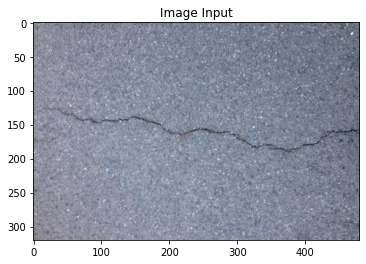

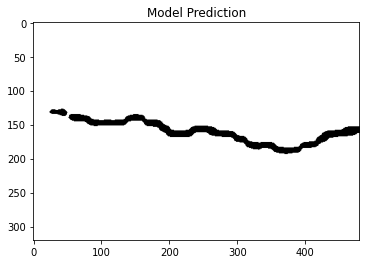

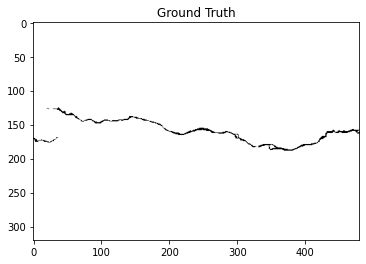

In [ ]:
%matplotlib inline
# Select a test image:
imno = 12

imPath = "dataset/test/"
imList = os.listdir(imPath+'images/')
mask = Image.open(os.path.join(imPath+'masks/',imList[imno].split('.')[0])+'_label.PNG')

imSegmenter.predict(imdir = imPath + 'images/' + imList[imno],classes=['crack'])
plt.imshow(mask,cmap='Greys'); plt.title('Ground Truth'); plt.show()